In [17]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

In [33]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

In [18]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=False, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [19]:
logis_clf = LogisticRegression()
rndmfor_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
estimators = [('lr', logis_clf), ('rf', rndmfor_clf), ('svm', svm_clf)],
voting = 'hard')


In [20]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 300, noise = 0.25)
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)

for train_index, test_index in split.split(np.c_[X, y], y):
    X_train, y_train = X[train_index, :], y[train_index]
    X_test, y_test = X[test_index, :], y[test_index]

voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=1, voting='hard', weights=None)

In [21]:
from sklearn.metrics import accuracy_score

for clf in (logis_clf, rndmfor_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accu = accuracy_score(y_test, pred)
    print(clf.__class__.__name__, accu)


LogisticRegression 0.8
RandomForestClassifier 0.933333333333
SVC 0.966666666667
VotingClassifier 0.95


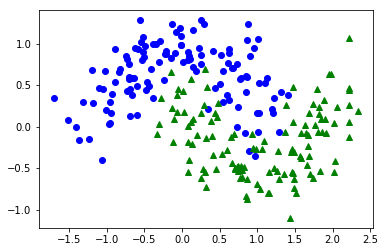

In [22]:
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'bo')
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], 'g^')
plt.show()

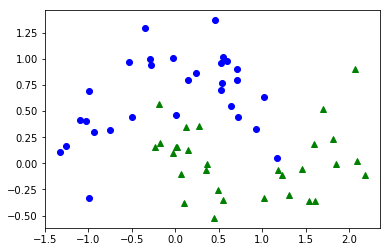

In [23]:
plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], 'bo')
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], 'g^')
plt.show()

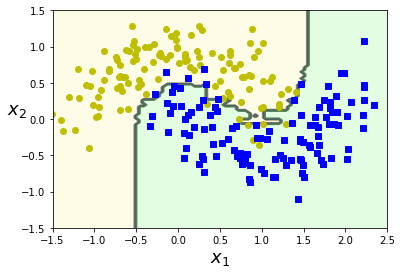

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators = 500,
                            max_samples = 100,
                            bootstrap = True,
                            n_jobs = -1
                           )
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

plot_decision_boundary(bag_clf, X_train, y_train, axes = [-1.5, 2.5, -1.5, 1.5])
plt.show()



In [25]:
from sklearn.datasets import load_iris
iris = load_iris()
rdmfor_clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
rdmfor_clf.fit(iris['data'], iris['target'])

for feat, imp in zip(iris['feature_names'], rdmfor_clf.feature_importances_):
    print(feat, imp)
    

sepal length (cm) 0.0848407380582
sepal width (cm) 0.0211947062179
petal length (cm) 0.439875832105
petal width (cm) 0.454088723619


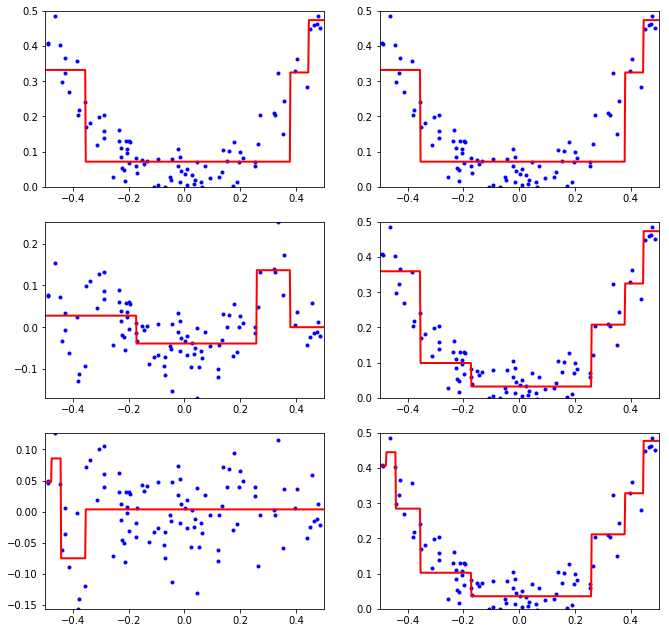

In [75]:

#boosting - adaboosting, gradient boosting
from  sklearn.tree import DecisionTreeRegressor

x = np.random.rand(100, 1) - 0.5
y = 2*x**2 + np.random.randn(100, 1)*0.05

#plt.plot(x, y, 'bo')
#plt.show()

tr1 = DecisionTreeRegressor(max_depth = 2)
tr1.fit(x, y)

pred1 = tr1.predict(x)
y2 = y - pred1.reshape(-1, 1)

tr2 = DecisionTreeRegressor(max_depth = 2)
tr2.fit(x, y2)

pred2 = tr2.predict(x)
y3 = y2 - pred2.reshape(-1, 1)

tr3 = DecisionTreeRegressor(max_depth = 2)
tr3.fit(x, y3)

x1 = np.linspace(-0.5, 0.5, 100)
pred12 = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in [tr1, tr2])

plt.figure(figsize = (11, 11))

plt.subplot(321)
plot_predictions([tr1], x, y, axes = [-0.5, 0.5, 0, 0.5])

plt.subplot(322)
plot_predictions([tr1], x, y, axes = [-0.5, 0.5, 0, 0.5])

plt.subplot(323)
plot_predictions([tr2], x, y2, axes = [-0.5, 0.5, y2.min(), y2.max()])

plt.subplot(324)
#plt.plot(x1, pred12, 'r-')
plot_predictions([tr1, tr2], x, y, axes = [-0.5, 0.5, 0, 0.5])

plt.subplot(325)
plot_predictions([tr3], x, y3, axes = [-0.5, 0.5, y3.min(), y3.max()])

plt.subplot(326)
plot_predictions([tr1, tr2, tr3], x, y, axes = [-0.5, 0.5, 0, 0.5])

plt.show()


In [74]:
m = y2.reshape(-1, 1);
print(x.shape, m.shape, pred1.shape, y2.shape, y.shape)
print(min(y2))

(100, 1) (100, 1) (100,) (100, 1) (100, 1)
[-0.23611902]


(100, 100) (100, 1)


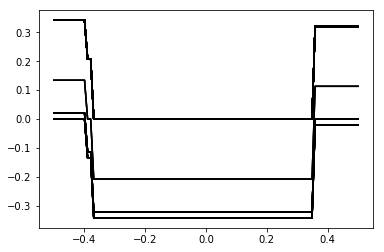

In [64]:
tr2.fit(x, y2.reshape(-1, 1))

k = tr2.predict(x1.reshape(-1, 1))
l = x1.reshape(-1, 1)
print(k.shape, l.shape)
plt.plot(x1, k, 'k-')
plt.show()